<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data_add_delta_(_0_4)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_-0.4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-0.4_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,66.178686,74.369731,39.665369,0.111588,190.325374,190.288363,0.037011
1,0.0,1.0,97.568082,63.655091,87.638501,-0.379995,258.481679,258.734586,-0.252906
2,0.0,2.0,75.341221,47.275650,44.281616,0.175853,177.074339,177.093754,-0.019415
3,0.0,3.0,96.670873,57.874667,89.426275,-0.429048,253.542767,253.870436,-0.327669
4,0.0,4.0,77.515824,54.615434,98.553875,0.028321,240.713453,240.584705,0.128748
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,95.672020,50.412396,26.010787,0.167710,182.262914,182.229476,0.033438
19996,999.0,16.0,89.139311,50.706413,68.478112,-0.190879,218.132958,218.499876,-0.366918
19997,999.0,17.0,37.284123,72.085986,34.176354,-0.038382,153.508081,153.487182,0.020899
19998,999.0,18.0,67.365047,94.245649,80.286413,0.425952,252.323061,251.955801,0.367260


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    66.178686  74.369731  39.665369  ...  190.325374  190.288363  0.037011
      1.0    97.568082  63.655091  87.638501  ...  258.481679  258.734586 -0.252906
      2.0    75.341221  47.275650  44.281616  ...  177.074339  177.093754 -0.019415
      3.0    96.670873  57.874667  89.426275  ...  253.542767  253.870436 -0.327669
      4.0    77.515824  54.615434  98.553875  ...  240.713453  240.584705  0.128748
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   95.672020  50.412396  26.010787  ...  182.262914  182.229476  0.033438
      16.0   89.139311  50.706413  68.478112  ...  218.132958  218.499876 -0.366918
      17.0   37.284123  72.085986  34.176354  ...  153.508081  153.487182  0.020899
      18.0   67.365047  94.245649  80.286413  ...  252.323061  251.955801  0.367260
      19.0   49.310627  97.690081  83.506772  ...  240.428031  240.512636 -0.084605

[20000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    66.178686  74.369731  39.665369  ...  190.325374  190.288363  0.037011
      1.0    97.568082  63.655091  87.638501  ...  258.481679  258.734586 -0.252906
      2.0    75.341221  47.275650  44.281616  ...  177.074339  177.093754 -0.019415
      3.0    96.670873  57.874667  89.426275  ...  253.542767  253.870436 -0.327669
      4.0    77.515824  54.615434  98.553875  ...  240.713453  240.584705  0.128748
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   95.672020  50.412396  26.010787  ...  182.262914  182.229476  0.033438
      16.0   89.139311  50.706413  68.478112  ...  218.132958  218.499876 -0.366918
      17.0   37.284123  72.085986  34.176354  ...  153.508081  153.487182  0.020899
      18.0   67.365047  94.245649  80.286413  ...  252.323061  251.955801  0.367260
      19.0   49.310627  97.690081  83.506772  ...  240.428031  240.512636 -0.084605

[20000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,66.178686,74.369731,39.665369,0.111588,190.325374,190.288363,0.037011
1,0.0,1.0,97.568082,63.655091,87.638501,-0.379995,258.481679,258.734586,-0.252906
2,0.0,2.0,75.341221,47.275650,44.281616,0.175853,177.074339,177.093754,-0.019415
3,0.0,3.0,96.670873,57.874667,89.426275,-0.429048,253.542767,253.870436,-0.327669
4,0.0,4.0,77.515824,54.615434,98.553875,0.028321,240.713453,240.584705,0.128748
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,95.672020,50.412396,26.010787,0.167710,182.262914,182.229476,0.033438
19996,999.0,16.0,89.139311,50.706413,68.478112,-0.190879,218.132958,218.499876,-0.366918
19997,999.0,17.0,37.284123,72.085986,34.176354,-0.038382,153.508081,153.487182,0.020899
19998,999.0,18.0,67.365047,94.245649,80.286413,0.425952,252.323061,251.955801,0.367260


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    66.178686  74.369731  39.665369  ...  190.325374  190.288363  0.037011
      1.0    97.568082  63.655091  87.638501  ...  258.481679  258.734586 -0.252906
      2.0    75.341221  47.275650  44.281616  ...  177.074339  177.093754 -0.019415
      3.0    96.670873  57.874667  89.426275  ...  253.542767  253.870436 -0.327669
      4.0    77.515824  54.615434  98.553875  ...  240.713453  240.584705  0.128748
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   95.672020  50.412396  26.010787  ...  182.262914  182.229476  0.033438
      16.0   89.139311  50.706413  68.478112  ...  218.132958  218.499876 -0.366918
      17.0   37.284123  72.085986  34.176354  ...  153.508081  153.487182  0.020899
      18.0   67.365047  94.245649  80.286413  ...  252.323061  251.955801  0.367260
      19.0   49.310627  97.690081  83.506772  ...  240.428031  240.512636 -0.084605

[20000 rows x 7 columns]

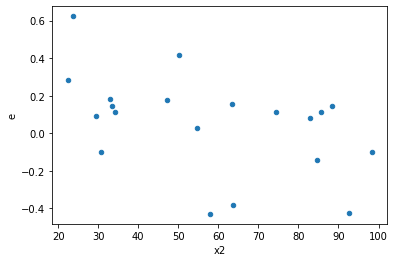

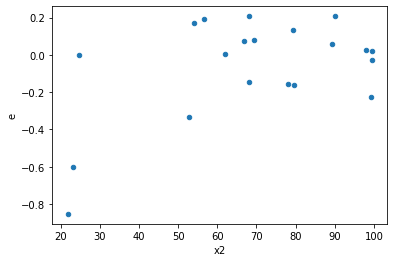

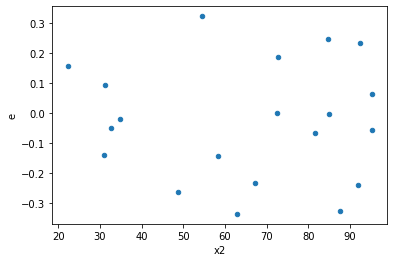

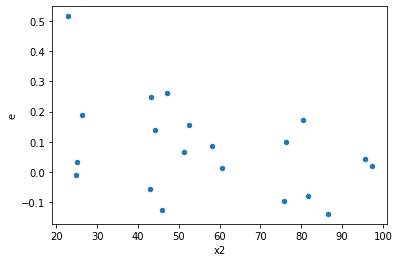

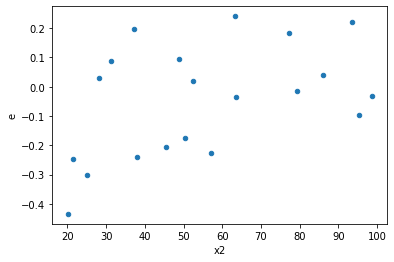

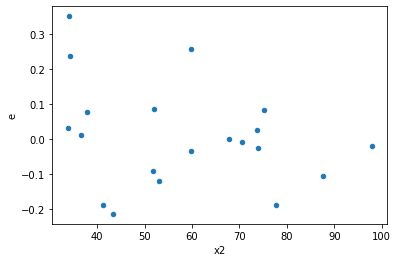

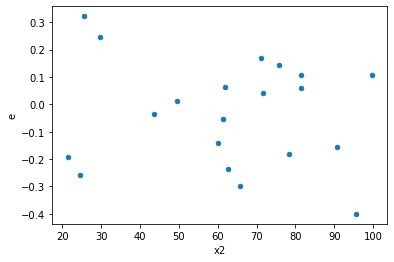

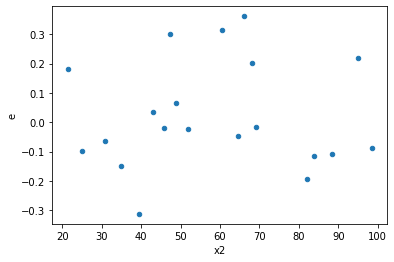

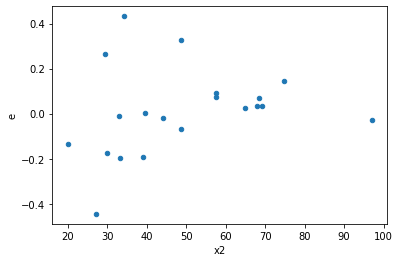

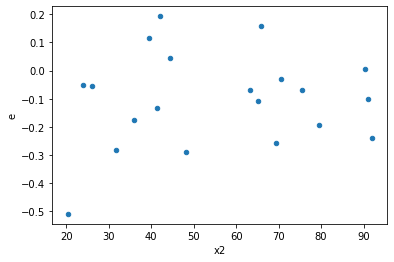

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]
    k_means = KMeans(n_clusters=2)
    model = k_means.fit(x)
    model

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = k_means.predict(x)
    y_kmeans

    # kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    data_sort_clusters = data_clusters.sort_values('clusters')
    data_sort_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster1 = data_sort_clusters[data_sort_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSR1 = model1.ssr
    MSE1 = model1.mse_resid

    # กลุ่มที่ 2
    data_cluster0 = data_sort_clusters[data_sort_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model0 = sm.OLS(y, x).fit()

    DF0 = model0.df_resid + 1
    SSR0 = model0.ssr
    MSE0 = model0.mse_resid

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSR1/DF1) / (SSR0/DF0)

    df1 = DF1
    df0 = DF0

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df0)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df0)
    
    return df0, df1, SSR0, SSR1, MSE0, MSE1, GQ_test_clusters, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df0=[]
list_df1=[]
list_SSR0=[]
list_SSR1=[]
list_MSE0=[]
list_MSE1=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df0, df1, SSR0, SSR1, MSE0, MSE1, GQ_test_clusters, two_tailed, p_greater=get_result(run_replicate)

    list_df0.append(df0)
    list_df1.append(df1)
    list_SSR0.append(SSR0)
    list_SSR1.append(SSR1)
    list_MSE0.append(MSE0)
    list_MSE1.append(MSE1)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1665: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1665: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1665: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1665: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1665: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1665: RuntimeWarning: divide by zero 

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df0":list_df0, "df1":list_df1, "SSR0":list_SSR0,
                     "SSR1":list_SSR1, "MSE0":list_MSE0, "MSE1":list_MSE1,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df0,df1,SSR0,SSR1,MSE0,MSE1,GQ_test_clusters,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
0.0,6.0,8.0,0.12982422425348192,0.2955694335804472,0.025964844850696382,0.04222420479720674,1.7075170405217341,0.5307079764642482,0.7346460117678759,Reject001=1 : Homoscedasticity
2.0,8.0,6.0,0.19267471669196187,0.1875210636808957,0.027524959527423124,0.03750421273617914,1.2976694046868256,0.7130852304225632,0.6434573847887184,Reject001=1 : Homoscedasticity
4.0,4.0,10.0,0.062109497719857916,0.3625553085209372,0.020703165906619306,0.04028392316899302,2.334942782221338,0.42950530082748717,0.7852473495862564,Reject001=1 : Homoscedasticity
6.0,5.0,9.0,0.04020069373206638,0.360712832312558,0.010050173433016596,0.04508910403906975,4.984889546609335,0.0916529452412076,0.9541735273793962,Reject001=1 : Homoscedasticity
8.0,10.0,4.0,0.28317666740860936,0.2460036665697637,0.03146407415651215,0.08200122218992123,2.1718214712124664,0.2917494450655429,0.8541252774672285,Reject001=1 : Homoscedasticity
9.0,4.0,10.0,0.049651865408520277,0.1902924395471184,0.01655062180284009,0.021143604394124268,1.5330134163657358,0.7233378232249512,0.6383310883875244,Reject001=1 : Homoscedasticity
11.0,6.0,8.0,0.05704928222965592,0.3149317681492935,0.011409856445931184,0.04499025259275622,4.140259384178316,0.10035076445174251,0.9498246177741287,Reject001=1 : Homoscedasticity
12.0,7.0,7.0,0.2415093751792267,0.3007646337525799,0.04025156252987112,0.050127438958763315,1.2453538647490567,0.7795964238834552,0.6102017880582724,Reject001=1 : Homoscedasticity
15.0,3.0,11.0,0.008371160549597922,0.18970825741661357,0.004185580274798961,0.018970825741661358,6.180578589137382,0.1603379271141805,0.9198310364429098,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df0":list_df0, "df1":list_df1, "SSR0":list_SSR0,
                     "SSR1":list_SSR1, "MSE0":list_MSE0, "MSE1":list_MSE1,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df0,df1,SSR0,SSR1,MSE0,MSE1,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,6.0,8.0,0.12982422425348192,0.2955694335804472,0.025964844850696382,0.04222420479720674,1.7075170405217341,1.4692920235357518,Reject001=1 : Homoscedasticity
1.0,14.0,1.0,0.37992144088296853,4.543838814073028e-26,0.02922472622176681,inf,1.6743920334998427e-24,2.0283828405281312e-12,Reject001=0 : Heteroscedasticity
2.0,8.0,6.0,0.19267471669196187,0.1875210636808957,0.027524959527423124,0.03750421273617914,1.2976694046868256,1.2869147695774368,Reject001=1 : Homoscedasticity
3.0,6.0,8.0,0.14495863673579504,0.10210904562340539,0.028991727347159008,0.014587006517629342,0.5283009411652634,0.39613509967024285,Reject001=1 : Homoscedasticity
4.0,4.0,10.0,0.062109497719857916,0.3625553085209372,0.020703165906619306,0.04028392316899302,2.334942782221338,0.42950530082748717,Reject001=1 : Homoscedasticity
5.0,8.0,6.0,0.13384208954770158,0.046015400741229215,0.01912029850681451,0.009203080148245843,0.458404884908089,0.35757076018501815,Reject001=1 : Homoscedasticity
6.0,5.0,9.0,0.04020069373206638,0.360712832312558,0.010050173433016596,0.04508910403906975,4.984889546609335,0.0916529452412076,Reject001=1 : Homoscedasticity
7.0,8.0,6.0,0.26905228870960685,0.19271481014474356,0.03843604124422955,0.03854296202894871,0.9550302709757866,0.9832062686219241,Reject001=1 : Homoscedasticity
8.0,10.0,4.0,0.28317666740860936,0.2460036665697637,0.03146407415651215,0.08200122218992123,2.1718214712124664,0.2917494450655429,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      952
Reject001=0 : Heteroscedasticity     48
Name: Result_test, dtype: int64